In [47]:
import numpy as np
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt


import numpy as np
pp.rcParams.update({'font.size': 14})
pp.rcParams['figure.figsize'] = [10, 5]

from matplotlib import animation, rc
from IPython.display import HTML

In [7]:
def wave_equation(u0,v0,N,M,T,c=1):
    from scipy import sparse
    k = T/M
    h = 1/(N+1)
    lam = c*k/h

    x = np.linspace(0,1,N+2)
    t = np.linspace(0,T,M+1)
        
    u = np.zeros((N+2,M+1))
    
    u[:,0] = u0(x)

    D = np.zeros((3,N))
    D[0,:] = 1
    D[1,:] = -2
    D[2,:] = 1
    D = sparse.spdiags(D,[-1,0,1],N,N)
    u[1:N+1,1] = u[1:N+1,0]+k*v0(x[1:N+1])+lam*lam/2*D*u[1:N+1,0]
    
    B = np.zeros((3,N))
    B[0,:] = lam*lam
    B[1,:] = 2*(1-lam*lam)
    B[2,:] = lam*lam

    B = sparse.spdiags(B,[1,0,-1],N,N)
    
    for k in range(2,M+1):
        u_pprev = u[1:N+1,k-2]
        u_prev = u[1:N+1,k-1]

        u_next = B.dot(u_prev) - u_pprev
        u[1:N+1,k] = u_next
    return (x,t,u)

In [29]:
u0 = lambda x,a: np.heaviside(x,0)*np.heaviside(a-x,0)*0.5*(1-np.cos(2*np.pi*x/a))
v0 = lambda x,a,c: -c*np.heaviside(x,0)*np.heaviside(a-x,0)*0.5*np.sin(2*np.pi*x/a)*2*np.pi/a



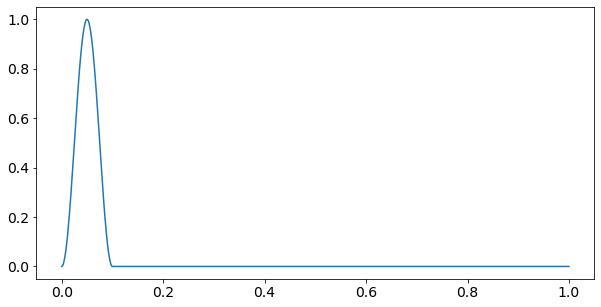

In [109]:
x=np.linspace(0,1,1000)
pp.plot(x,u0(x,a=0.1))

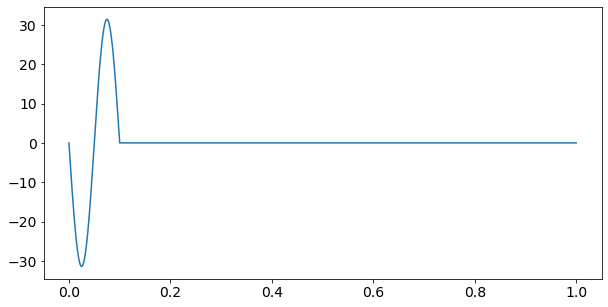

In [110]:
pp.plot(x,v0(x,a=0.1,c=1))

N=150 M=303


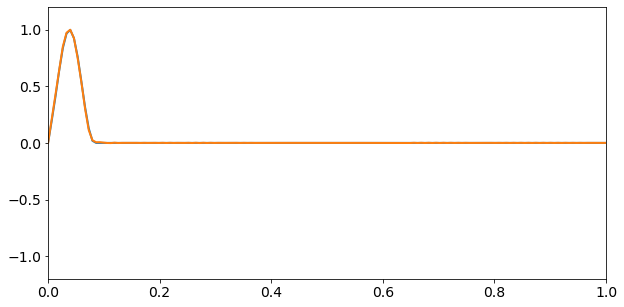

In [118]:
a=0.09
c=1
N=150
T=2

u_exact = lambda x,t: u0(x-t,a)-u0(-x+2-t,a)+u0(x+2-t,a)

lam = 0.999

h=1/(N+1)
M = int(np.ceil(T/h/lam))

print("N=%d M=%d" % (N,M) )

[x,t,u]=wave_equation(lambda x: u0(x,a),lambda x: v0(x,a,c),N,M,T,c=c)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-1.2, 1.2))
exact, = ax.plot([], [], lw=2)
solution, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    solution.set_data([], [])
    exact.set_data([], [])
    return (exact,solution)

# animation function. This is called sequentially
def animate(i):
    solution.set_data(x, u[:,i])
    exact.set_data(x, u_exact(x,i*T/M))
    return (exact,solution)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=M, interval=40, blit=True)
HTML(anim.to_html5_video())

N=150 M=616


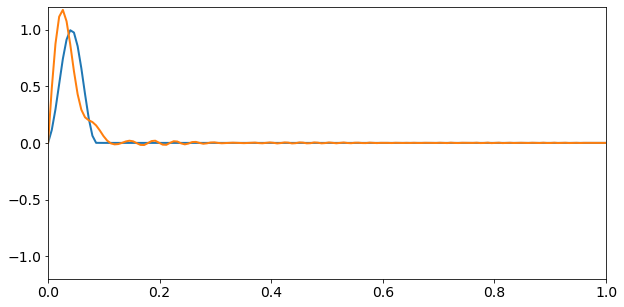

In [116]:
a=0.09
c=1
N=150
T=2

u_exact = lambda x,t: u0(x-t,a)-u0(-x+2-t,a)+u0(x+2-t,a)


lam = 0.49

h=1/(N+1)
M = int(np.ceil(T/h/lam))
print("N=%d M=%d" % (N,M) )

[x,t,u]=wave_equation(lambda x: u0(x,a),lambda x: v0(x,a,c),N,M,T,c=c)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-1.2, 1.2))
exact, = ax.plot([], [], lw=2)
solution, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    solution.set_data([], [])
    exact.set_data([], [])
    return (exact,solution)

# animation function. This is called sequentially
def animate(i):
    solution.set_data(x, u[:,i])
    exact.set_data(x, u_exact(x,i*T/M))
    return (exact,solution)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=M, interval=20, blit=True)
HTML(anim.to_html5_video())